# **MINOR PROJECT : Powerball-Winning Numbers : Analysis ans Prediction using Prophet**

---






# **TASK 1** - Exploratory Data Analysis




#Question \#1 : How can you identify hidden trends and patterns in the Powerball winning numbers dataset? Are there any specific techniques or algorithms that can be used to uncover these trends?



To identify hidden trends and patterns in the Powerball winning numbers dataset, Exploratory Data Analysis (EDA) can be employed. EDA involves examining and visualizing the data to gain insights and discover underlying patterns. Here are some techniques and algorithms that can be used within EDA to uncover trends:

1. Line Plots: Line plots are useful for visualizing the frequency of each number being drawn over time. By plotting the number of occurrences of each number on the y-axis and the corresponding draw dates on the x-axis, patterns in the frequency of numbers can be identified. This helps in determining if certain numbers appear more frequently than others.

2. Heat Maps: Heat maps provide a graphical representation of the correlation between different numbers. Each number is represented as a row and a column in the heatmap, and the intersection of two numbers indicates the correlation between them. By analyzing the intensity of the colors in the heatmap, patterns of association or dependence between numbers can be revealed.

3. Distribution Plots: Distribution plots, such as histograms or kernel density plots, can show the frequency distribution of the winning numbers. This helps in identifying the central tendency, spread, and skewness of the number distribution. Patterns like clustering or unusual distributions can be observed.

4. Frequency Analysis: Conducting a frequency analysis of the winning numbers can help identify numbers that appear more frequently than others. This can be done by calculating the count or percentage of occurrence for each number. Patterns such as "hot" or "cold" numbers, where certain numbers have a higher or lower frequency, can be detected.

These techniques, when applied as part of EDA, can assist in uncovering hidden trends and patterns in the Powerball winning numbers dataset. Visualizations like line plots, heat maps, and distribution plots are particularly effective in providing insights into the frequency, correlation, and distribution of the winning numbers.



In [1]:
# libraries used
import numpy as np
import pandas as pd
import prophet as Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# loading the dataset from github
url = 'https://raw.githubusercontent.com/sukritipunj/powerball-winning-dataset/main/powerball.csv'
#urllib.parse.unquote(url)
data = pd.read_csv(url)

In [3]:
data.head()

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0


In [4]:
data['Winning Numbers']

0       11 21 27 36 62 24
1       14 18 36 49 67 18
2       18 31 36 43 47 20
3       06 24 30 53 56 19
4       05 18 23 40 50 18
              ...        
1424    01 04 12 36 49 05
1425    31 43 58 59 66 09
1426    02 08 15 19 58 10
1427    05 11 22 23 69 07
1428    52 58 59 64 66 09
Name: Winning Numbers, Length: 1429, dtype: object

In [5]:
# converting this space separated string to separate columns of type integer
data ['Winning Numbers'] = data[ 'Winning Numbers'].str.split(' ')
data[[ 'ball1','ball2','ball3', 'ball4','ball5', 'ball6']] = data[ 'Winning Numbers' ].apply(lambda x: pd.Series (x))
data[[ 'ball1','ball2','ball3', 'ball4','ball5', 'ball6']] = data[[ 'ball1','ball2','ball3', 'ball4','ball5', 'ball6']].astype(int)

In [6]:
data.head()

,Draw Date,Winning Numbers,Multiplier,ball1,ball2,ball3,ball4,ball5,ball6
0,09/26/2020,"[11, 21, 27, 36, 62, 24]",3.0,11,21,27,36,62,24
1,09/30/2020,"[14, 18, 36, 49, 67, 18]",2.0,14,18,36,49,67,18
2,10/03/2020,"[18, 31, 36, 43, 47, 20]",2.0,18,31,36,43,47,20
3,10/07/2020,"[06, 24, 30, 53, 56, 19]",2.0,6,24,30,53,56,19
4,10/10/2020,"[05, 18, 23, 40, 50, 18]",3.0,5,18,23,40,50,18


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        1429 non-null   object 
 1   Winning Numbers  1429 non-null   object 
 2   Multiplier       1219 non-null   float64
 3   ball1            1429 non-null   int64  
 4   ball2            1429 non-null   int64  
 5   ball3            1429 non-null   int64  
 6   ball4            1429 non-null   int64  
 7   ball5            1429 non-null   int64  
 8   ball6            1429 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 100.6+ KB


# Question \#2 : Can you provide a visualization of the winning numbers over time? For example, a line plot showing the frequency of each number being drawn or a heat map showing the correlation between different numbers.

In [8]:
# Exploratory Data Analysis (EDA)

# Calculate the frequency of each number being drawn
number_columns = ['ball1', 'ball2', 'ball3', 'ball4', 'ball5', 'ball6']
number_frequency = data[number_columns].stack().value_counts().sort_index()


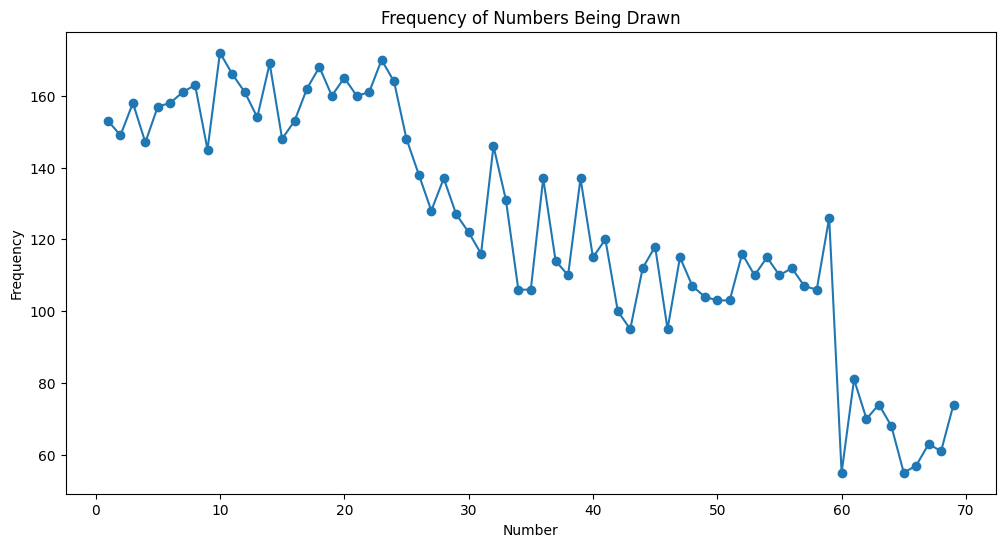

In [9]:
# Plot line plot showing the frequency of each number being drawn
plt.figure(figsize=(12, 6))
number_frequency.plot(kind="line", marker="o")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Frequency of Numbers Being Drawn")
plt.show()

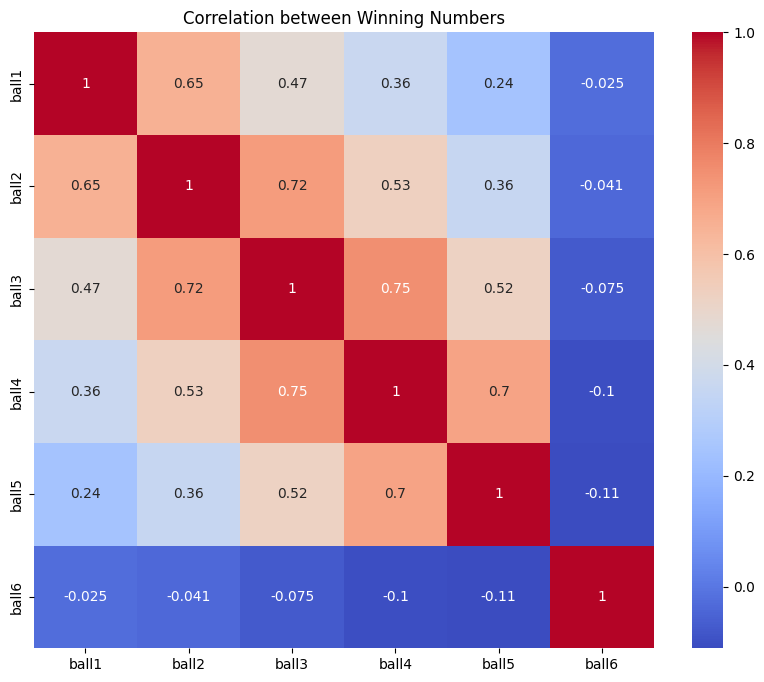

In [10]:
# Plot heatmap showing the correlation between different numbers
number_correlation = data[number_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(number_correlation, annot=True, cmap="coolwarm")
plt.title("Correlation between Winning Numbers")
plt.show()

#Question \#3 : What are the characteristics of the luckiest numbers in the Powerball lottery? Are there any specific numbers that appear more frequently than others? Can you provide insights into the frequency distribution of the numbers?

In [12]:
# Extract the ball numbers from the dataset
ball_columns = ['ball1', 'ball2', 'ball3', 'ball4', 'ball5', 'ball6']
all_numbers = data[ball_columns].values.flatten()


In [13]:
# Calculate the frequency of each number
number_frequency = pd.Series(all_numbers).value_counts().sort_index()

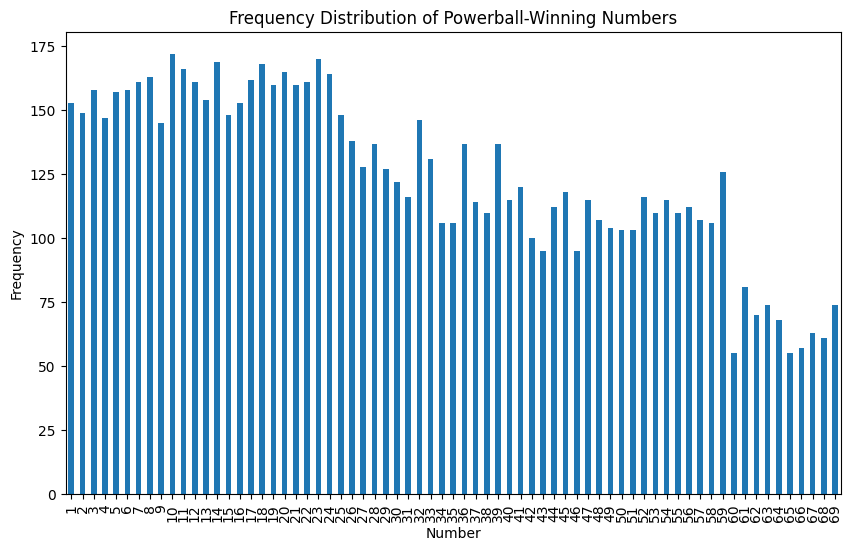

Top 10 Luckiest Numbers:
1     153
2     149
3     158
4     147
5     157
6     158
7     161
8     163
9     145
10    172
dtype: int64


In [14]:
# Plot the frequency distribution of the numbers
plt.figure(figsize=(10, 6))
number_frequency.plot(kind="bar")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Powerball-Winning Numbers")
plt.show()

# Display the top 10 luckiest numbers
top_luckiest_numbers = number_frequency.head(10)
print("Top 10 Luckiest Numbers:")
print(top_luckiest_numbers)

#Question \#4 : How can you predict the luckiest number for future Powerball drawings? Are there any machine learning algorithms or statistical techniques that can be employed for this prediction task?

The Prophet is a powerful time series forecasting tool that can be used to predict the luckiest number for future Powerball drawings.

  1. **Handling Time Series Data:** Facebook Prophet is
  designed specifically for time series forecasting, making it well-suited for analyzing and predicting the winning numbers in the Powerball lottery. It takes into account the temporal nature of the data, including trends, seasonality, and other time-dependent patterns.

  2. **Trend Detection:** Prophet is capable of automatically detecting and modeling various trends in the data. It can capture both long-term trends, such as overall increasing or decreasing patterns, as well as short-term fluctuations. By understanding and incorporating these trends, Prophet can provide valuable insights into the future behavior of the winning numbers.

By leveraging these capabilities, Facebook Prophet can analyze the historical winning numbers, capture the underlying trends and patterns, and make predictions for the luckiest number in future Powerball drawings. However, it is important to note that predicting lottery numbers is inherently challenging due to the random nature of the draws, and the accuracy of the predictions may vary.

--------------------------------------------------------------------------

In the context of predicting the luckiest number for future Powerball drawings, Prophet can be used to analyze the historical winning numbers data and make predictions for future drawings.

The role of Prophet in predicting the luckiest number involves the following steps:

1. Data Preparation: The historical winning numbers data is preprocessed to meet the input requirements of Prophet. This includes converting the dataset into a specific format with the 'ds' (date) and 'y' (winning number) columns.

2. Model Initialization: Prophet is initialized with default or custom settings, depending on the specific requirements. The model can be customized to account for seasonality, holidays, and other patterns present in the data.

3. Model Fitting: The historical data is used to train the Prophet model. The model learns from the patterns and variations in the winning numbers over time.

4. Future Prediction: Once the model is trained, it can generate predictions for future Powerball drawings. By providing a set of future dates, Prophet generates forecasts for the luckiest numbers based on the learned patterns and trends from the historical data.

5. Evaluation: The performance of the Prophet model can be evaluated using various metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). These metrics assess the accuracy of the predicted luckiest numbers compared to the actual winning numbers.

By leveraging the capabilities of Prophet, such as handling seasonality and capturing complex time series patterns, it becomes possible to make predictions for the luckiest number in future Powerball drawings. However, it's important to note that predicting the luckiest number in a lottery is inherently challenging due to the random nature of the draws.

In [15]:
# Pre-Processing data for Time-Series Analysis
data['Year'] = data['Draw Date'].apply(lambda x: str (x)[-4: ])
data['Day'] = data['Draw Date'].apply(lambda x: str (x) [-7:-5])
data[ 'Month' ] = data['Draw Date'].apply(lambda x: str (x) [-10:-8])
data['ds'] = pd.DatetimeIndex(data['Day']+'-' +data[ 'Month' ]+'-' +data['Year'])

prophet_data = data[['Draw Date', 'ball1', 'ball2', 'ball3', 'ball4', 'ball5', 'ball6']]
prophet_data.columns = ['ds', 'ball1', 'ball2', 'ball3', 'ball4', 'ball5', 'ball6']

# Melt the data to create separate rows for each ball number
prophet_data = pd.melt(prophet_data, id_vars='ds', value_vars=['ball1', 'ball2', 'ball3', 'ball4', 'ball5', 'ball6'],
                       var_name='Ball', value_name='Winning Number')

# Convert the 'Winning Number' column to integer
prophet_data['y'] = prophet_data['Winning Number'].astype(int)


<ipython-input-15-dd5521dc7285>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['ds'] = pd.DatetimeIndex(data['Day']+'-' +data[ 'Month' ]+'-' +data['Year'])


In [ ]:
# Initialize and fit the Prophet model for each ball
models = {}
for ball in range(1, 7):
    ball_data = prophet_data[prophet_data['Ball'] == f'ball{ball}'][['ds', 'y']]
    ball_data.columns = ['ds', 'y']
    ball_model = Prophet.Prophet()
    ball_model.fit(ball_data)
    models[ball] = ball_model

In [17]:
# Make future predictions for each ball
future = pd.DataFrame({'ds': pd.date_range(start=data['Draw Date'].max(), periods=7)})
predicted_numbers = pd.DataFrame({'ds': future['ds']})

for ball, model in models.items():
    ball_forecast = model.predict(future)
    predicted_numbers[f'ball{ball}'] = ball_forecast['yhat'].astype(int)

# Print the predicted winning numbers
print(predicted_numbers)


          ds  ball1  ball2  ball3  ball4  ball5  ball6
0 2022-12-31     14     25     37     48     58     12
1 2023-01-01     19     27     41     46     60     15
2 2023-01-02     13     25     36     46     57     14
3 2023-01-03     19     27     41     46     60     15
4 2023-01-04     14     25     37     48     57     13
5 2023-01-05     18     26     41     46     59     16
6 2023-01-06     18     26     40     45     59     16


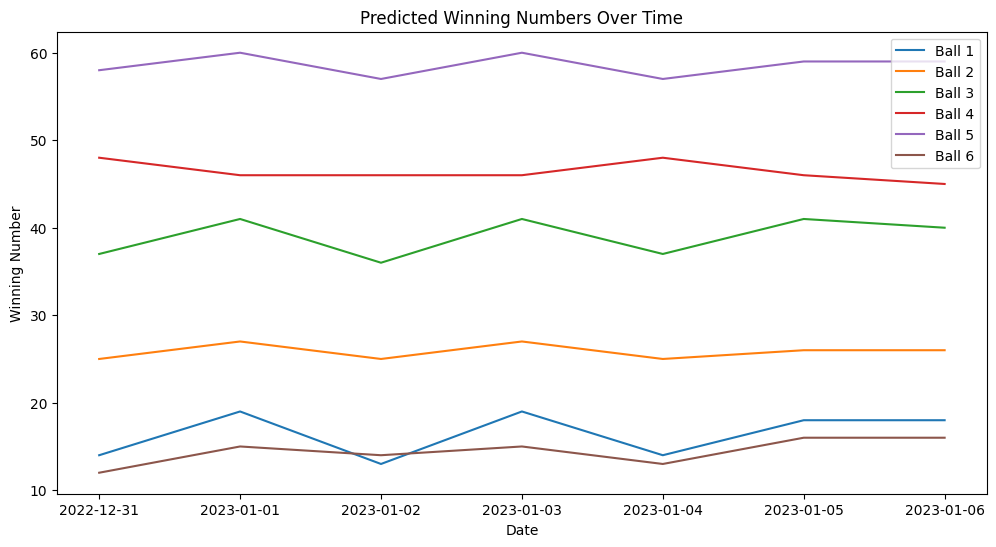

In [18]:
# Visualize the predicted winning numbers
plt.figure(figsize=(12, 6))
for ball in range(1, 7):
    plt.plot(predicted_numbers['ds'], predicted_numbers[f'ball{ball}'], label=f'Ball {ball}')

plt.title('Predicted Winning Numbers Over Time')
plt.xlabel('Date')
plt.ylabel('Winning Number')
plt.legend()
plt.show()

#Question \#5 : How can you evaluate the performance of the luckiest number prediction model? What metrics or methods would be appropriate to assess the accuracy of the predicted lucky numbers compared to the actual winning numbers?

To evaluate the performance of the luckiest number prediction model using the Prophet model, you can employ various metrics and methods to assess the accuracy of the predicted lucky numbers compared to the actual winning numbers. Here are some evaluation techniques you can consider:

1. Mean Absolute Error (MAE): Calculate the absolute difference between the predicted lucky numbers and the actual winning numbers, and then take the average. Lower MAE values indicate better accuracy.

2. Mean Squared Error (MSE): Calculate the squared difference between the predicted lucky numbers and the actual winning numbers, and then take the average. MSE provides a measure of the average squared deviation between the predicted and actual values.

3. Root Mean Squared Error (RMSE): Take the square root of the MSE to obtain the RMSE. This metric is commonly used as it has the same scale as the original data, making it interpretable in the same units as the winning numbers.

4. R-squared (R2) score: Calculate the coefficient of determination, which measures the proportion of variance in the actual winning numbers that is explained by the predicted lucky numbers. Higher R2 values indicate a better fit between the predicted and actual values.

5. Visual Comparison: Plot the predicted lucky numbers alongside the actual winning numbers over time. Visually inspect how well the predicted values align with the actual values and look for any significant deviations or patterns.

These metrics and methods can provide a quantitative and qualitative assessment of the accuracy and performance of the luckiest number prediction model using the Prophet model. It is recommended to use a combination of these evaluation techniques to gain a comprehensive understanding of the model's effectiveness in predicting the lucky numbers.

In [19]:
# Select the actual winning numbers for comparison
actual_numbers = data[['ball1', 'ball2', 'ball3', 'ball4', 'ball5', 'ball6']].iloc[-7:].reset_index(drop=True)

# Calculate evaluation metrics
mae = mean_absolute_error(actual_numbers.values, predicted_numbers[['ball1', 'ball2', 'ball3', 'ball4', 'ball5', 'ball6']].values)
mse = mean_squared_error(actual_numbers.values, predicted_numbers[['ball1', 'ball2', 'ball3', 'ball4', 'ball5', 'ball6']].values)
rmse = mean_squared_error(actual_numbers.values, predicted_numbers[['ball1', 'ball2', 'ball3', 'ball4', 'ball5', 'ball6']].values, squared=False)
r2 = r2_score(actual_numbers.values, predicted_numbers[['ball1', 'ball2', 'ball3', 'ball4', 'ball5', 'ball6']].values)


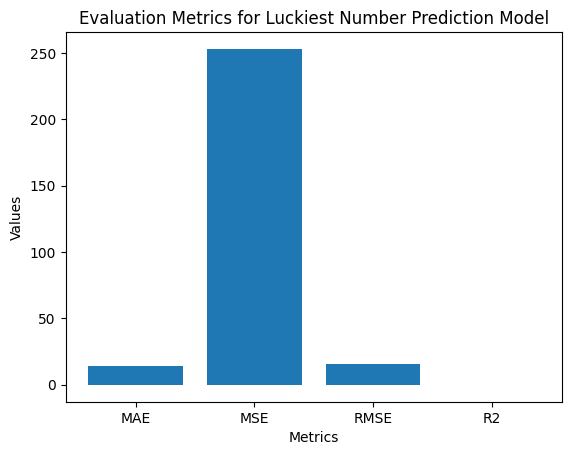

Mean Absolute Error (MAE): 13.928571428571429
Mean Squared Error (MSE): 253.11904761904762
Root Mean Squared Error (RMSE): 15.122063810843548
R-squared (R2) Score: -0.28331065135207767


In [20]:
# Visualize the evaluation metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae, mse, rmse, r2]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for Luckiest Number Prediction Model')
plt.show()

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)